In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
obesity_df= pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
obesity_df.shape

(2111, 17)

In [6]:
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
obesity_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
obesity_df.rename(columns= {'NObeyesdad':'Obesity_Level'}, inplace = True)
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
obesity_df['Obesity_Level'].unique()


array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [10]:
df= obesity_df['Obesity_Level'].isin(['Normal_Weight','Insufficient_Weight'])
obesity_df[df]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level
0,Female,21.000000,1.620000,64.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
5,Male,29.000000,1.620000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
6,Female,23.000000,1.500000,55.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Motorbike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,Female,19.000000,1.531610,42.000000,no,yes,2.749268,1.394539,Frequently,no,1.322048,no,0.463949,0.800993,Sometimes,Public_Transportation,Insufficient_Weight
741,Female,19.434709,1.525691,42.000000,no,yes,3.000000,1.000000,Frequently,no,1.764055,no,0.000000,0.560887,Sometimes,Public_Transportation,Insufficient_Weight
742,Male,18.000000,1.719827,52.289828,yes,yes,1.202075,3.000000,Sometimes,no,1.927976,no,0.023574,1.747256,Sometimes,Public_Transportation,Insufficient_Weight
743,Male,18.381382,1.722547,53.783977,yes,yes,2.000000,3.131032,Sometimes,no,2.072194,no,1.487987,2.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [11]:
obesity_df['BMI']= obesity_df['Weight'] / (obesity_df['Height']**2) 
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [12]:
obesity_df.dropna(how ='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


<AxesSubplot:xlabel='Gender', ylabel='BMI'>

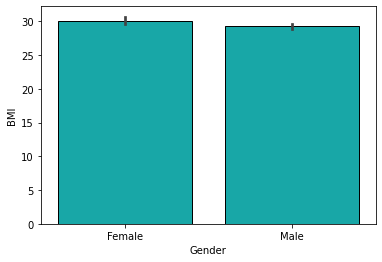

In [13]:
sns.barplot(x= 'Gender', y= 'BMI', data= obesity_df,color = 'c', edgecolor='black')

<AxesSubplot:xlabel='FAVC', ylabel='BMI'>

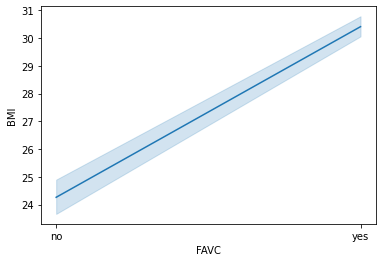

In [14]:
sns.lineplot(x='FAVC', y='BMI', data= obesity_df, estimator = np.mean)

In [16]:
obesity_df.groupby('Obesity_Level')[['BMI','Age']].agg(np.mean).sort_values(by= ['BMI','Age'], ascending= False)

,BMI,Age
Obesity_Level,,
Obesity_Type_III,42.273746,23.495554
Obesity_Type_II,36.723424,28.233785
Obesity_Type_I,32.255636,25.884941
Overweight_Level_II,28.215232,26.996981
Overweight_Level_I,25.990772,23.417674
Normal_Weight,22.014147,21.738676
Insufficient_Weight,17.404245,19.783237


<AxesSubplot:xlabel='family_history_with_overweight', ylabel='BMI'>

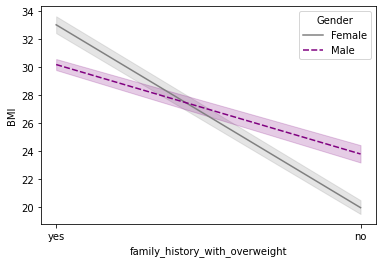

In [17]:
sns.lineplot(x='family_history_with_overweight', y='BMI' ,data = obesity_df, hue = 'Gender',palette=['gray','purple'],style='Gender' )

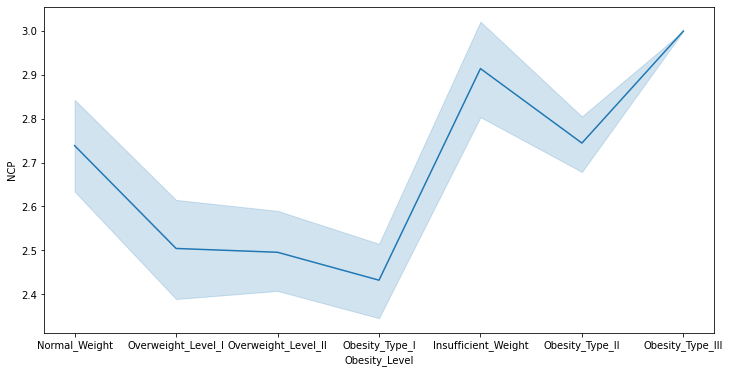

In [18]:
fig = plt.figure(figsize = (12,6))
x= sns.lineplot(x='Obesity_Level', y='NCP',data= obesity_df, estimator=np.mean)
#x.set_xticklabels(x.get_xticklabels(), rotation= 90);
plt.show()

<AxesSubplot:xlabel='NCP', ylabel='BMI'>

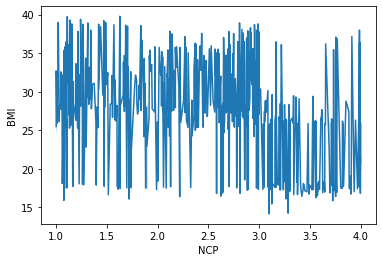

In [19]:
sns.lineplot(x='NCP', y='BMI', data= obesity_df)

<AxesSubplot:xlabel='CAEC', ylabel='BMI'>

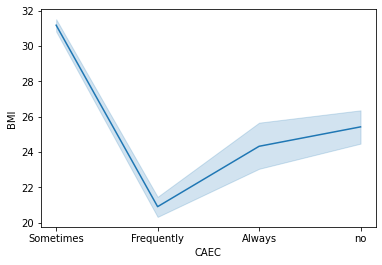

In [20]:
sns.lineplot(x='CAEC', y='BMI', data= obesity_df)

<AxesSubplot:xlabel='CALC', ylabel='BMI'>

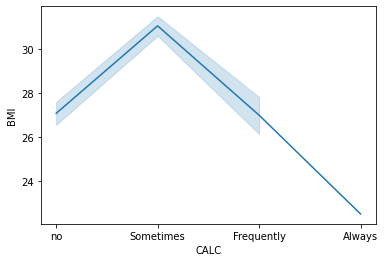

In [21]:
sns.lineplot(x='CALC',y= 'BMI', data= obesity_df)

<AxesSubplot:xlabel='BMI', ylabel='FAF'>

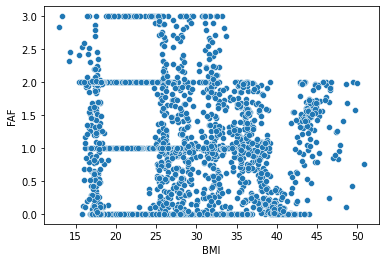

In [22]:
sns.scatterplot(x='BMI',y= 'FAF', data= obesity_df)

In [23]:
obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'Obesity_Level', 'BMI'],
      dtype='object')

<AxesSubplot:xlabel='SMOKE', ylabel='BMI'>

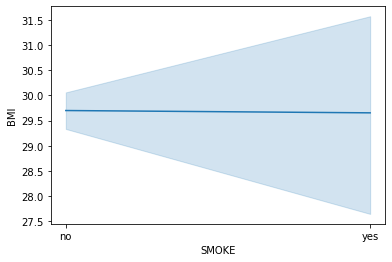

In [24]:
sns.lineplot(x='SMOKE', y='BMI', data= obesity_df)

<AxesSubplot:xlabel='CH2O', ylabel='BMI'>

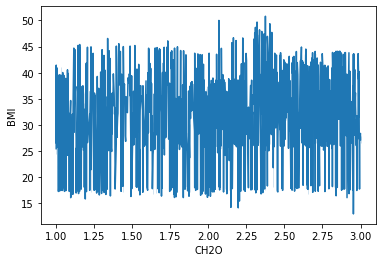

In [25]:
sns.lineplot(x='CH2O', y='BMI', data= obesity_df )

<AxesSubplot:xlabel='SCC', ylabel='BMI'>

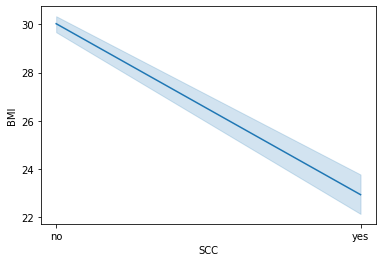

In [26]:
sns.lineplot(x='SCC', y='BMI' , data= obesity_df)

<AxesSubplot:xlabel='FAF', ylabel='BMI'>

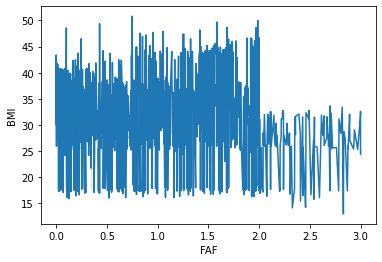

In [27]:
sns.lineplot(x='FAF', y='BMI', data= obesity_df)

<AxesSubplot:xlabel='TUE', ylabel='BMI'>

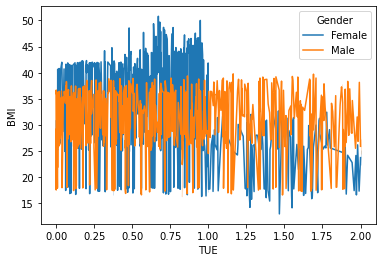

In [28]:
sns.lineplot(x='TUE', y= 'BMI', data= obesity_df, hue='Gender')

<AxesSubplot:xlabel='MTRANS', ylabel='BMI'>

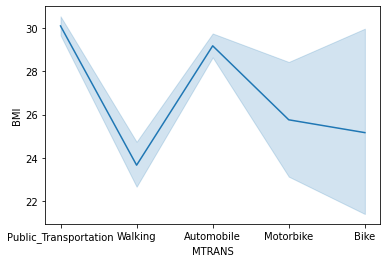

In [29]:
sns.lineplot(x='MTRANS', y='BMI', data= obesity_df)

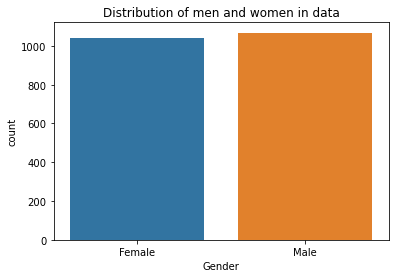

In [30]:
sns.countplot(x='Gender', data= obesity_df)
plt.title('Distribution of men and women in data')
plt.show()

In [31]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [32]:
obesity_df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [33]:
obesity_df['Obesity_Level'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity_Level, dtype: int64

In [34]:
obesity_df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [35]:
obesity_df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

### Encoding Categorical Data

In [36]:
cleanup_nums = {"Obesity_Level": {"Insufficient_Weight": 0, "Normal_Weight": 1 , "Overweight_Level_I": 2, "Overweight_Level_II" : 3, "Obesity_Type_I" : 4, "Obesity_Type_II" : 5, "Obesity_Type_III" : 6},
               "family_history_with_overweight": {"no" : 0, "yes":1},
               "Gender":{"Female":0, "Male":1},
               "FAVC":{"no":0,"yes":1},
               "SMOKE":{"no":0, "yes":1},
               "SCC":{"no":0,"yes":1},
               'CALC':{"no":0,"Sometimes":1,"Frequently":2,"Always":3},
               "MTRANS":{"Motorbike":0,"Automobile":0,"Public_Transportation":0,"Bike":2,"Walking":1}}

In [37]:
obesity_df = obesity_df.replace(cleanup_nums)
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,0,0,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,1,0,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,2,0,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,2,1,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,1,0,3,28.342381


<AxesSubplot:title={'center':'BMI'}, xlabel='Obesity_Level'>

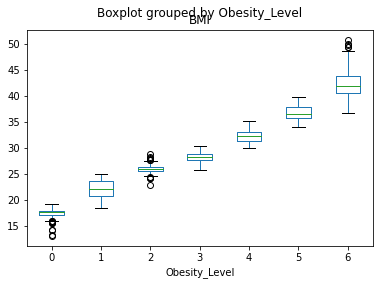

In [38]:
obesity_df.boxplot(by ='Obesity_Level', column =['BMI'], grid = False)

In [39]:
obesity_df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_Level,BMI
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.044698,0.107930,-0.102633,0.189607,0.017269,-0.007616,0.065439,-0.031464,-0.053035
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,-0.049387,0.282913,0.244163
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.047137,0.133565,0.131785
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,-0.095065,0.913251,0.934806
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,-0.063821,0.505148,0.483508
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,-0.194557,0.247793,0.246097
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,-0.006014,0.227759,0.263651
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.018938,0.026690,0.039969
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,0.009119,0.003442,-0.000819
CH2O,0.107930,-0.045304,0.213376,0.200575,0.147437,0.009719,0.068461,0.057088,-0.031995,1.000000,0.008036,0.167236,0.011965,0.091386,0.022065,0.133008,0.144200


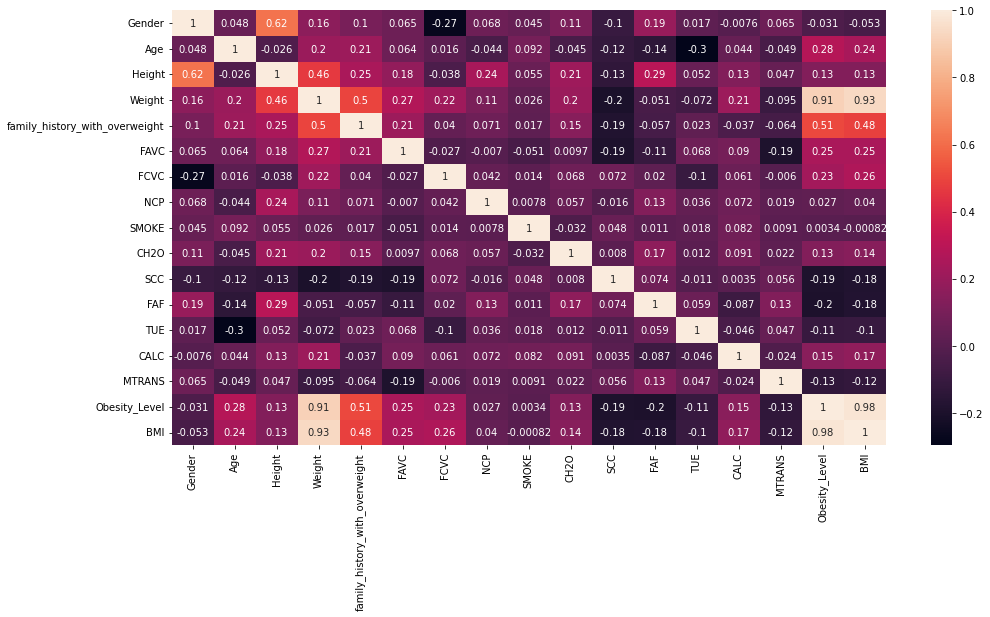

In [40]:
plt.figure(figsize=(16, 8))
ax = sns.heatmap(obesity_df.corr(), annot=True)

### Selecting 4 highest correlated variables : BMI, family_history_with_overweight, Age, Weight, FAVC, FCVC

In [41]:
X = obesity_df[['BMI','family_history_with_overweight', 'Age']]
Y = obesity_df[['Obesity_Level']]

In [42]:
X

,BMI,family_history_with_overweight,Age
0,24.386526,1,21.000000
1,24.238227,1,21.000000
2,23.765432,1,23.000000
3,26.851852,0,27.000000
4,28.342381,0,22.000000
...,...,...,...
2106,44.901475,1,20.976842
2107,43.741923,1,21.982942
2108,43.543817,1,22.524036
2109,44.071535,1,24.361936


In [43]:
Y

,Obesity_Level
0,1
1,1
2,1
3,2
4,3
...,...
2106,6
2107,6
2108,6
2109,6


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [47]:
svm=SVC()
rf = RandomForestClassifier()

In [48]:
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

D:\anocanda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PIYUSH~1\AppData\Local\Temp/ipykernel_3648/3640370977.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
pred_svm = svm.predict(X_test)
pred_rf = rf.predict(X_test)

In [50]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        89
           1       0.97      0.63      0.76        94
           2       0.79      0.91      0.85        93
           3       0.87      0.89      0.88        75
           4       0.97      0.96      0.96       113
           5       0.93      0.91      0.92        88
           6       0.92      0.95      0.93        82

    accuracy                           0.89       634
   macro avg       0.90      0.89      0.89       634
weighted avg       0.90      0.89      0.89       634



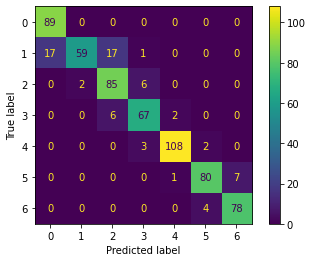

In [51]:
cm_svm = confusion_matrix(y_test, pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot();

In [52]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       0.96      0.97      0.96        94
           2       0.96      0.92      0.94        93
           3       0.94      0.91      0.93        75
           4       0.96      0.96      0.96       113
           5       0.97      0.95      0.96        88
           6       0.96      1.00      0.98        82

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



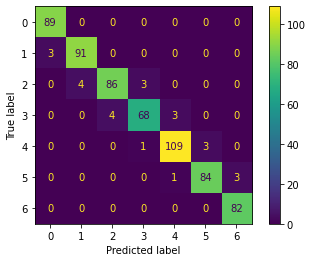

In [53]:
cm_rf = confusion_matrix(y_test, pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot();